In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("teco.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def naner(df,column):#function to create nan values instead of '?'
    lst = []
    for ques in df[column]:
        if ques == ' ':
            lst.append(np.nan)
        else:
            lst.append(ques)
    df[column] = lst

In [4]:
for col in df.columns:
    naner(df,col)

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
def trinarizer(col):
    tri_lst = []
    for val in df[col]:
        if val == 'Yes':
            tri_lst.append(1)
        elif val == 'No':
            tri_lst.append(0)
        elif val == 'No phone service':
            tri_lst.append(-1)
        elif val == 'No internet service':
            tri_lst.append(-1)
    return tri_lst

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
for column in df.columns:
    print(f"{column}:{df[column].unique()}") 

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [9]:
num_dat = []
for val in df["Contract"]:
    if val == 'Month-to-month':
        num_dat.append(0)
    elif val == 'Two year':
        num_dat.append(2)
    elif val == 'One year':
        num_dat.append(1)
df['Contract'] = num_dat

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [11]:
num_dat = []
for val in df["PaymentMethod"]:
    if val == 'Mailed check':
        num_dat.append(0)
    elif val == 'Bank transfer (automatic)':
        num_dat.append(2)
    elif val == 'Electronic check':
        num_dat.append(1)
    elif val == 'Credit card (automatic)':
        num_dat.append(3)
df['PaymentMethod'] = num_dat

In [12]:
num_dat = []
for val in df["InternetService"]:
    if val == 'No':
        num_dat.append(0)
    elif val == 'Fiber optic':
        num_dat.append(2)
    elif val == 'DSL':
        num_dat.append(1)
df['InternetService'] = num_dat

In [13]:
cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
for col in cols:
    tri_data = trinarizer(col)
    df[col] = tri_data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,-1,1,0,...,0,0,0,0,0,Yes,1,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,1,No,0,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,0,Yes,0,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,-1,1,1,...,1,1,0,0,1,No,2,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,2,0,...,0,0,0,0,0,Yes,1,70.70,151.65,1


In [14]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.325004,1.222916,0.069999,0.128212,0.127219,0.073548,0.167684,0.171234,0.690473,1.422547,64.761692,2283.300441,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.778877,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.833755,1.064952,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,118.750000,8684.800000,1.000000


In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(value=df['TotalCharges'].mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.groupby('gender').Churn.sum()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [18]:
df.groupby('SeniorCitizen').Churn.sum()

SeniorCitizen
0    1393
1     476
Name: Churn, dtype: int64

In [19]:
df.groupby('InternetService').Churn.sum()

InternetService
0     113
1     459
2    1297
Name: Churn, dtype: int64

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,-1,1,0,...,0,0,0,0,0,Yes,1,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,1,No,0,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,0,Yes,0,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,-1,1,1,...,1,1,0,0,1,No,2,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,2,0,...,0,0,0,0,0,Yes,1,70.70,151.65,1


<Axes: >

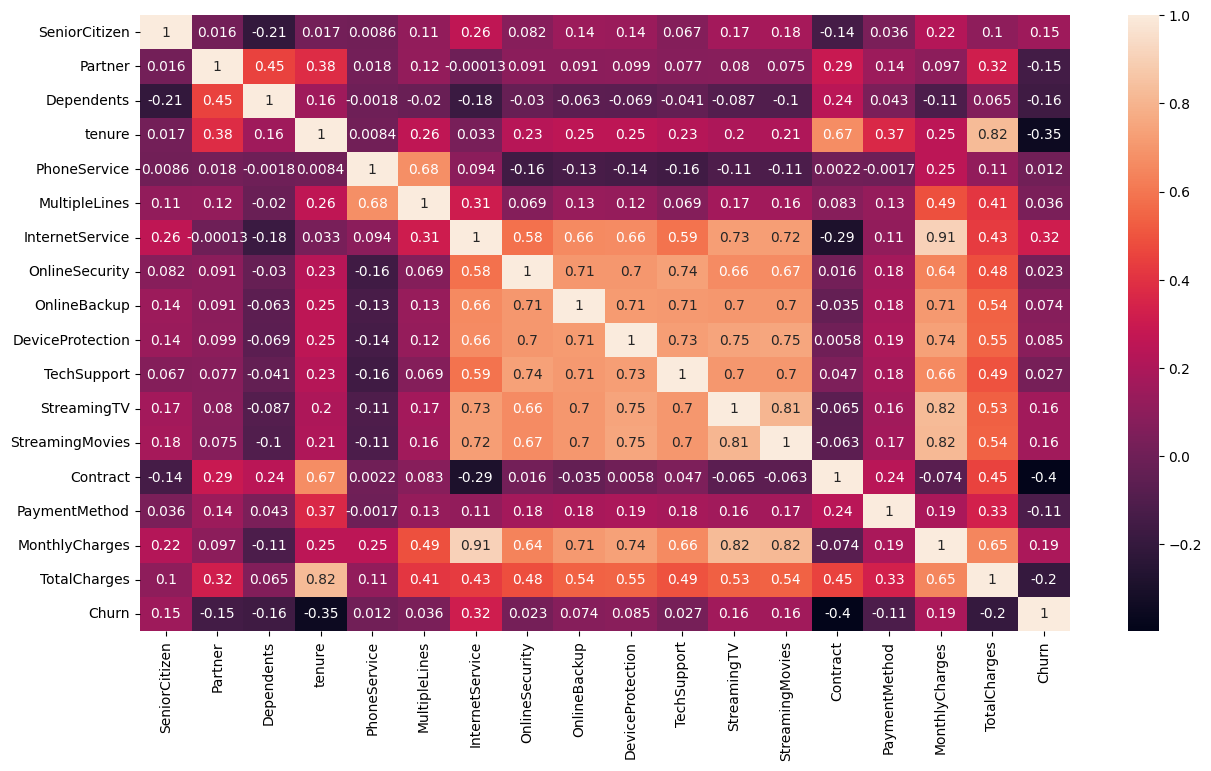

In [24]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(annot=True,data=corr)

In [22]:
for column in df.columns:
    print(f"{column}:{df[column].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[-1  0  1]
InternetService:[1 2 0]
OnlineSecurity:[ 0  1 -1]
OnlineBackup:[ 1  0 -1]
DeviceProtection:[ 0  1 -1]
TechSupport:[ 0  1 -1]
StreamingTV:[ 0  1 -1]
StreamingMovies:[ 0  1 -1]
Contract:[0 1 2]
PaperlessBilling:['Yes' 'No']
PaymentMethod:[1 0 2 3]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [23]:
df.to_csv("preprocessed_telco_churn.csv")